## **I. Title: Determining the accuracy of classifying wine from 3 cultivars on the basis of its chemical composition**

## **II. Introduction**

Winemaking is a complex process involving and affected by various factors that countless winemakers and connoisseurs have sought to understand in their quest towards high quality wine. Since wine is created from the fermentation of grapes, there is an inherent relationship between the cultivar, the specific variety of grape that is bred & cultivated for winemaking, and the wine itself. Each cultivar is known for distinct characteristics, taste, and style (Marzano et al., 2016). Various studies over the years have been conducted on how specific cultivars are related to different physical and chemical profiles (Restuccia et al., 2017).

Based on this connection, the group will be answering the following question: can a wine’s chemical composition be used to predict the grape cultivar that it was made from? The data set that will be used is named Wine, taken from the UC Irvine Machine Repository (Aeberhard & Forina, 1991). It is derived from a chemical analysis conducted on wines produced from grapes of 3 different cultivars, but within the same area in Italy. 13 different characteristics were measured and quantified from the 3 wines. The amount of certain chemical compounds comprise most of the data, such as alcohol content. 178 observations are present in the data set, each classified as either 1, 2, or 3 to indicate its cultivar. 

## **III. Methods and Results**

<span style="color: blue;"> 
To begin the analysis, the data is loaded and tidied. The data is downloaded as a tempfile to avoid having to locally download. The column names are copied directly from the source page and added onto the data frame. After adding column names, the data is already in a tidy format because each observation has its own row, with each column referencing a single variable, and each cell containing one value (Table 1). 
</span>

In [78]:
# loading all the packages we need for our proposal
library(tidyverse)
library(utils)
library(tidymodels)
library(rvest)
library(GGally)
options(repr.matrix.max.rows = 6)

In [79]:
# Source: https://archive.ics.uci.edu/dataset/109/wine

temp <- tempfile()
url_ <- "https://archive.ics.uci.edu/static/public/109/wine.zip"
download.file(url_,temp)

In [80]:
# Using this method, we successfully read the zipped data directly from source website 
# without downloading it!
wine_data <- read_delim(unz(temp,"wine.data"), delim = ",", col_name = FALSE)|>
             mutate(X1 = as_factor(X1))|>
             mutate(X1 = fct_recode(X1, "class1" = "1", "class2" = "2", "class3" = "3"))
unlink(temp)

colnames(wine_data) <- c('class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                         'Nonflavanoid_phenols','Proanthocyanins','Color_intensity', 'Hue','OD280_OD315_of_diluted_wines',
                         'Proline')

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Table 1: Complete Wine Data Set

In [81]:
wine_data

class  Alcohol Malicacid Ash  Alcalinity_of_ash Magnesium Total_phenols
1   class1 14.23   1.71      2.43 15.6              127       2.80         
2   class1 13.20   1.78      2.14 11.2              100       2.65         
3   class1 13.16   2.36      2.67 18.6              101       2.80         
⋮   ⋮      ⋮       ⋮         ⋮    ⋮                 ⋮         ⋮            
176 class3 13.27   4.28      2.26 20.0              120       1.59         
177 class3 13.17   2.59      2.37 20.0              120       1.65         
178 class3 14.13   4.10      2.74 24.5               96       2.05         
    Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity Hue 
1   3.06       0.28                 2.29            5.64            1.04
2   2.76       0.26                 1.28            4.38            1.05
3   3.24       0.30                 2.81            5.68            1.03
⋮   ⋮          ⋮                    ⋮               ⋮               ⋮   
176 0.69       0.43                 1.35            10.2            0.59
177 0.68       0.53                 1.46             9.3            0.60
178 0.76       0.56                 1.35             9.2            0.61
    OD280_OD315_of_diluted_wines Proline
1   3.92                         1065   
2   3.40                         1050   
3   3.17                         1185   
⋮   ⋮                            ⋮      
176 1.56                         835    
177 1.62                         840    
178 1.60                         560

<span style="color: blue;"> 
At this point in the analysis, exploratory data analysis is performed. First, the distribution of the 3 classes is shown using a table that displays the count and percentage of each class within the entire data set (Table 2). Note that class refers to cultivar, or the specific variety of grape used to make the wine, and both terms will be used interchangeably throughout the analysis. The result shows that there is a relatively balanced distrbution of the 3 classes, and none of the classes particularly overwhelm the data set. This means there is no need to resolve class imbalance in this data set.
</span>

In [82]:
num_obs <- nrow(wine_data)
class_dist <- wine_data|>
    group_by(class)|>
     summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

# Table 2: Distribution of classes within the complete data set

In [83]:
class_dist

class  count percentage
1 class1 59    33.14607  
2 class2 71    39.88764  
3 class3 48    26.96629

<span style="color: blue;"> 
Now, the variables are further explored to see their relation to the classes. Two of the variables in the data set, color intensity and alcohol, are plotted against each other to see the distribution of the 3 classes (Figure 1). Looking at the plot, there are some areas where a class particularly dominates however there are also areas where all 3 classes overlap. This indicates that the data must be further explored to pick variables that do not overlap so much with regards to the variables in order to choose good predictors and create an accurate classifier. For now, this provides some preliminary insight about the data.
</span>

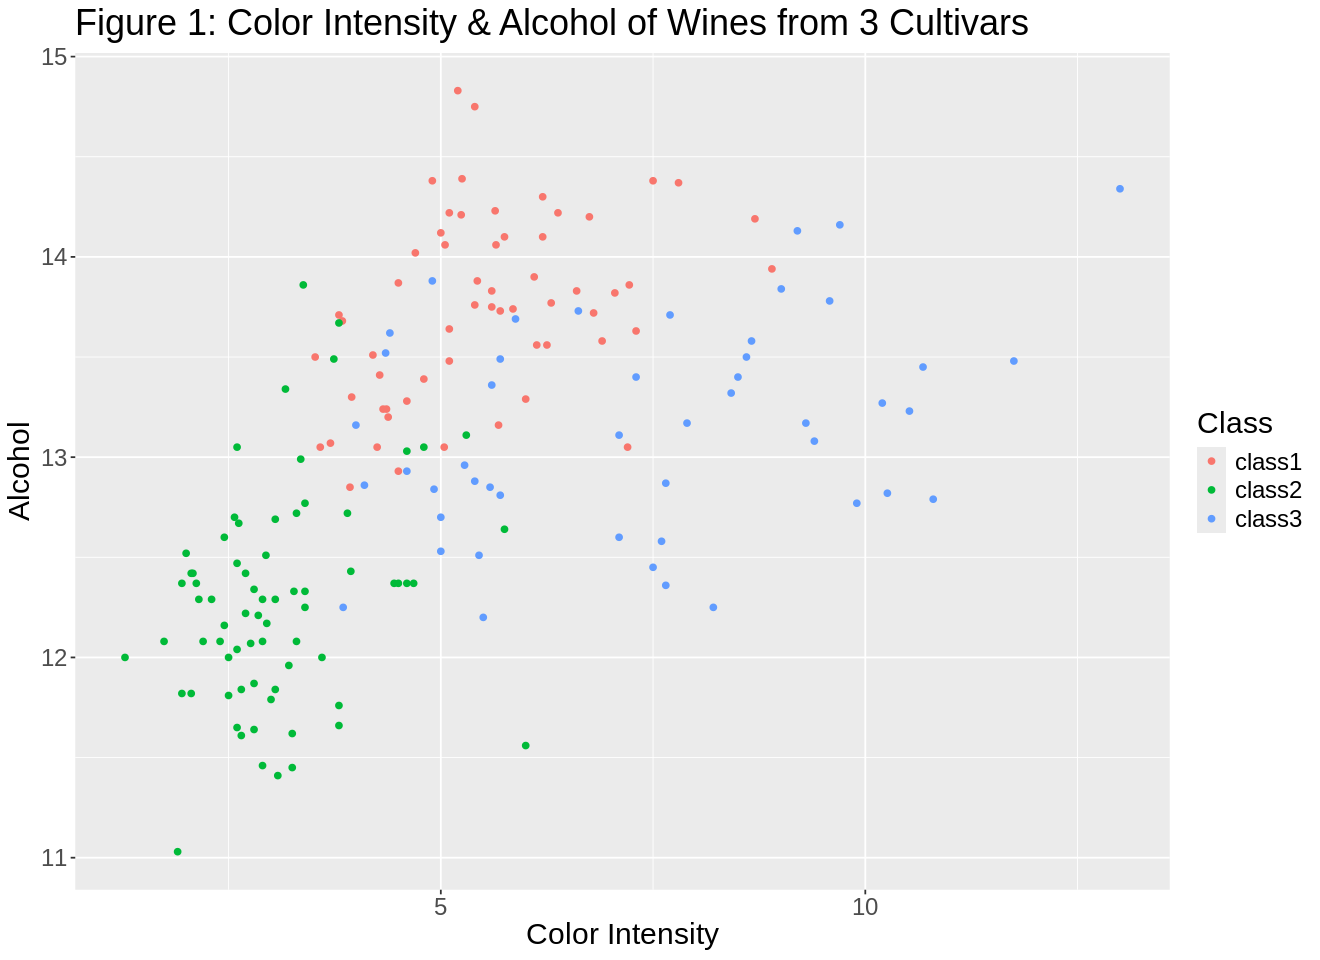

In [84]:
# Note: No units were provided in the source of the data set so none are included in axes labels.
options(repr.plot.width =11 , repr.plot.height = 8)
Color_intensity_Alcohol <- ggplot(wine_data, aes(x = Color_intensity, y = Alcohol, color = class)) +
                           geom_point() +
                           labs(x = "Color Intensity", y = "Alcohol", color = "Class") + 
                           ggtitle("Figure 1: Color Intensity & Alcohol of Wines from 3 Cultivars") +
                           theme(text = element_text(size = 18))
                           
Color_intensity_Alcohol

<span style="color: blue;"> 
After setting the seed to ensure a repeatable outcome, the random forest method is employed to find out the 5 variables that have the strongest correlation with the class variable (Breiman et al., 2022; R-Bloggers, 2021). The method yielded Proline, Flavanoids, Alcohol, Color_intensity, and OD280_OD315_of_diluted_wines as the 5 most important variables. Even if the seed was changed to conduct different tests, the results are stable and consistent (although there may be differences in order). This is convincing evidence that these variables have the strongest correlation with the cultivar. Figure 2 provides further evidence by showing that the random forest model has a very high accuracy, with errors for all variables below 0.1. Based on this, the group decided to use these 5 variables as predictors for the classifier model.
</span>

In [85]:
# We set the seed to make sure our outcome is repeatable
set.seed(333)

wine_split <- initial_split(wine_data, prop = 0.75, strata = class)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

In [86]:
# We set the seed to make sure our outcome to be repeatable
set.seed(333)

library(randomForest)
model <- randomForest(class ~ ., data = wine_training)
importance <- importance(model)
important_variables <- data.frame(Variable = row.names(importance), 
                            Importance = importance[, "MeanDecreaseGini"], 
                            row.names = NULL)|>
                 slice_max(importance, n = 5)|>
                 pull(Variable)
important_variables 

[1] "Proline"                      "Flavanoids"                  
[3] "Alcohol"                      "Color_intensity"             
[5] "OD280_OD315_of_diluted_wines"

# Figure 2: Random Forest Model of 5 most important variables

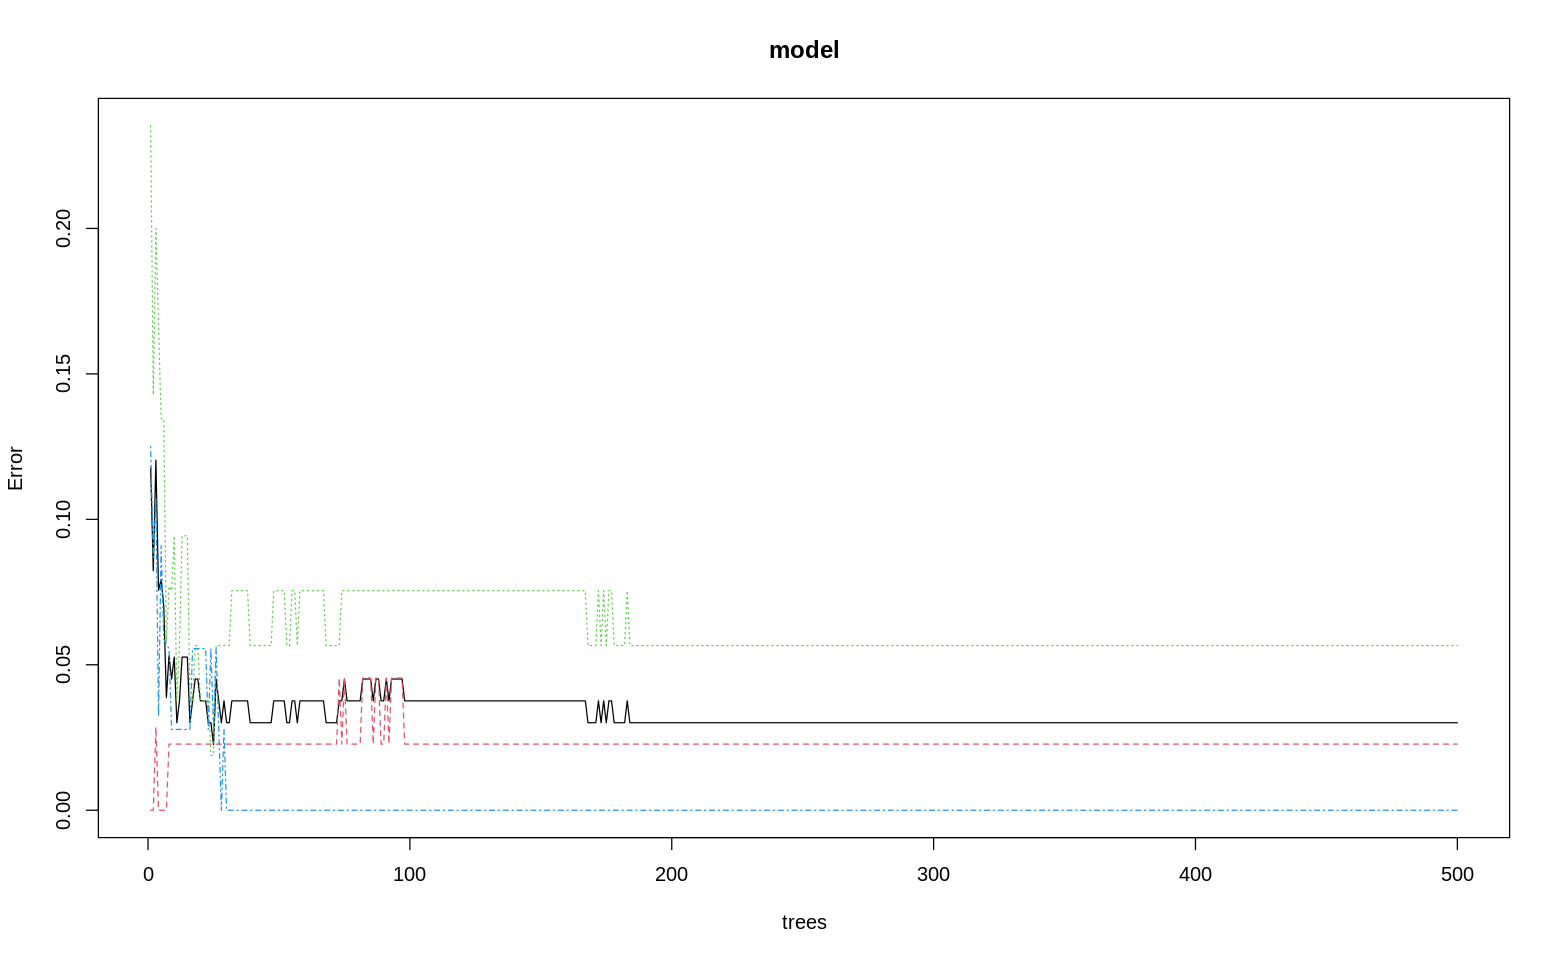

In [87]:
options(repr.plot.width =13 , repr.plot.height = 8)
plot(model) 

<span style="color: blue;"> 
Now that the 5 most important variables have been chosen, the data can be explored specifically in relation to these. The sample number and percentage of each class and the mean value of each variable for the 3 classes are shown using a table (Table 3). The results show a difference in the mean values of the different variables depending on the class. None of the variables have exactly the same value across the 3 classes. This is evidence that the data is suitable for classification purposes, as it is best for the different predictors to have different behaviors for each of the classes to result in accurate predictions.
</span>

In [88]:
wine_training_select <- select(wine_training,class, all_of(important_variables))

num_obs_training <- nrow(wine_training_select)
stats_per_variable <- group_by(wine_training_select, class)|>
summarize(count = n(),
          percentage = n() / num_obs_training * 100,
          across(all_of(important_variables), mean))

# Table 3: Proportion and mean of each variable for the 3 classes

In [89]:
stats_per_variable

class  count percentage Proline   Flavanoids Alcohol  Color_intensity
1 class1 44    33.08271   1115.4545 3.0172727  13.70568 5.611818       
2 class2 53    39.84962    510.4906 2.1288679  12.16642 3.132642       
3 class3 36    27.06767    629.4444 0.7563889  13.07722 7.530833       
  OD280_OD315_of_diluted_wines
1 3.110227                    
2 2.784906                    
3 1.643611

<span style="color: blue;"> 
To truly determine the levels of correlation between the selected variables and the distribution of classes, a scatter matrix was produced (Figure 3). The outcome revealed that the 5 variables selected as predictors have clear correlations with the class variables in their distributions. This is indicated by the fact that none of the 3 class distributions are completely overlapped across all of the variables. They have some degree of mutual correlations, but this wouldn't affect the effectiveness of the K-nearest neighbor method too much because clear boundaries for the class distribution are visible. Based on this, the group concluded to use the 5 variables as predictors for the classification model.
</span>

In [90]:
training_select_scatter <- ggpairs(wine_training_select, columns = important_variables, ggplot2::aes(colour=class)) + theme(text = element_text(size = 14))

# Figure 3: Distribution of classes and correlation among selected variables

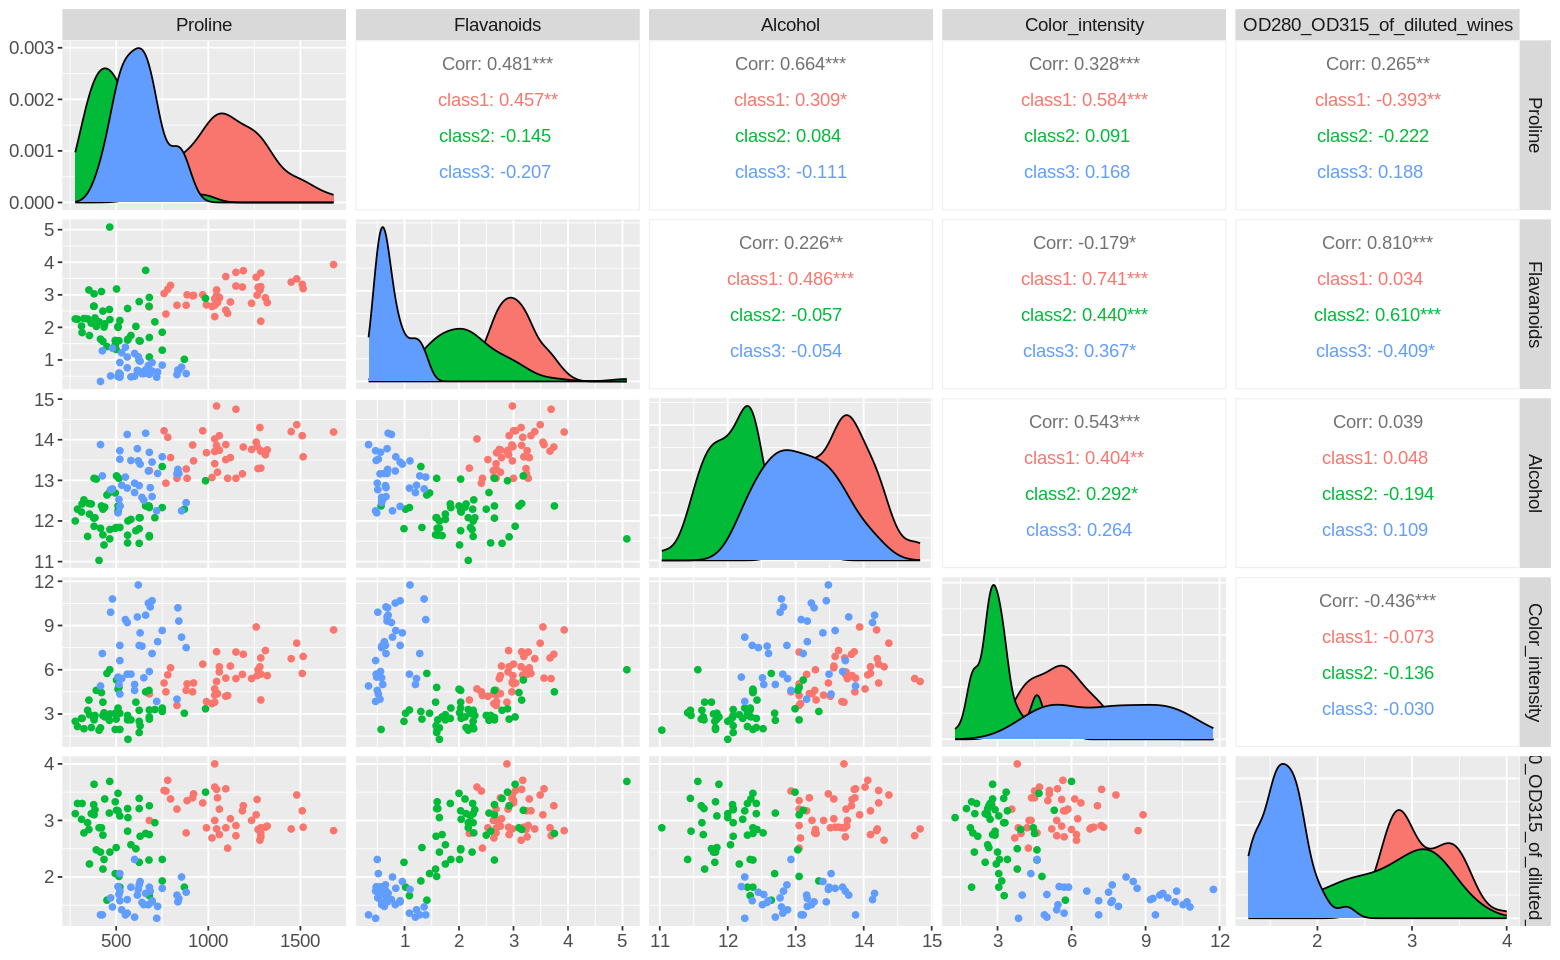

In [91]:
options(repr.plot.width =13 , repr.plot.height = 8) 
training_select_scatter

<span style="color: blue;"> 
Now that the exploratory data analysis has been performed and the variables to be used as predictors have been chosen, it was time to actually start building the model. This began with using cross-validation to tune the classifier so the number of neighbors could be decided. After collecting the metrics, the accuracies of different Ks were shown in a table (Table 4). This was used to generate a plot of neighbors against accuracies, which visualized how the accuracy of the model was affected by different numbers of neighbors (Figure 4). The highest accuracies seemed to be generated by K = 39 and K = 41.

In [92]:
# We set the seed to make sure our conclusion is repeatable
set.seed(333)

wine_vfold <- vfold_cv(wine_training_select, v = 5,strata = class)

wine_recipe <- recipe(class~.,
                     data = wine_training_select)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                  set_engine("kknn") |>
                  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 51, by = 2))


knn_results <- workflow() |>
      add_recipe(wine_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = wine_vfold, grid = k_vals) |>
      collect_metrics()

accuracies <- knn_results |>
      filter(.metric == "accuracy")            

# Table 4: Accuracy of the model on the training set for different values of K

In [93]:
accuracies 

neighbors .metric  .estimator mean      n std_err    .config              
1  1         accuracy multiclass 0.9629223 5 0.01660896 Preprocessor1_Model01
2  3         accuracy multiclass 0.9703297 5 0.01819005 Preprocessor1_Model02
3  5         accuracy multiclass 0.9774725 5 0.01525653 Preprocessor1_Model03
⋮  ⋮         ⋮        ⋮          ⋮         ⋮ ⋮          ⋮                    
24 47        accuracy multiclass 0.9618006 5 0.01217510 Preprocessor1_Model24
25 49        accuracy multiclass 0.9698006 5 0.01431890 Preprocessor1_Model25
26 51        accuracy multiclass 0.9541083 5 0.01887702 Preprocessor1_Model26

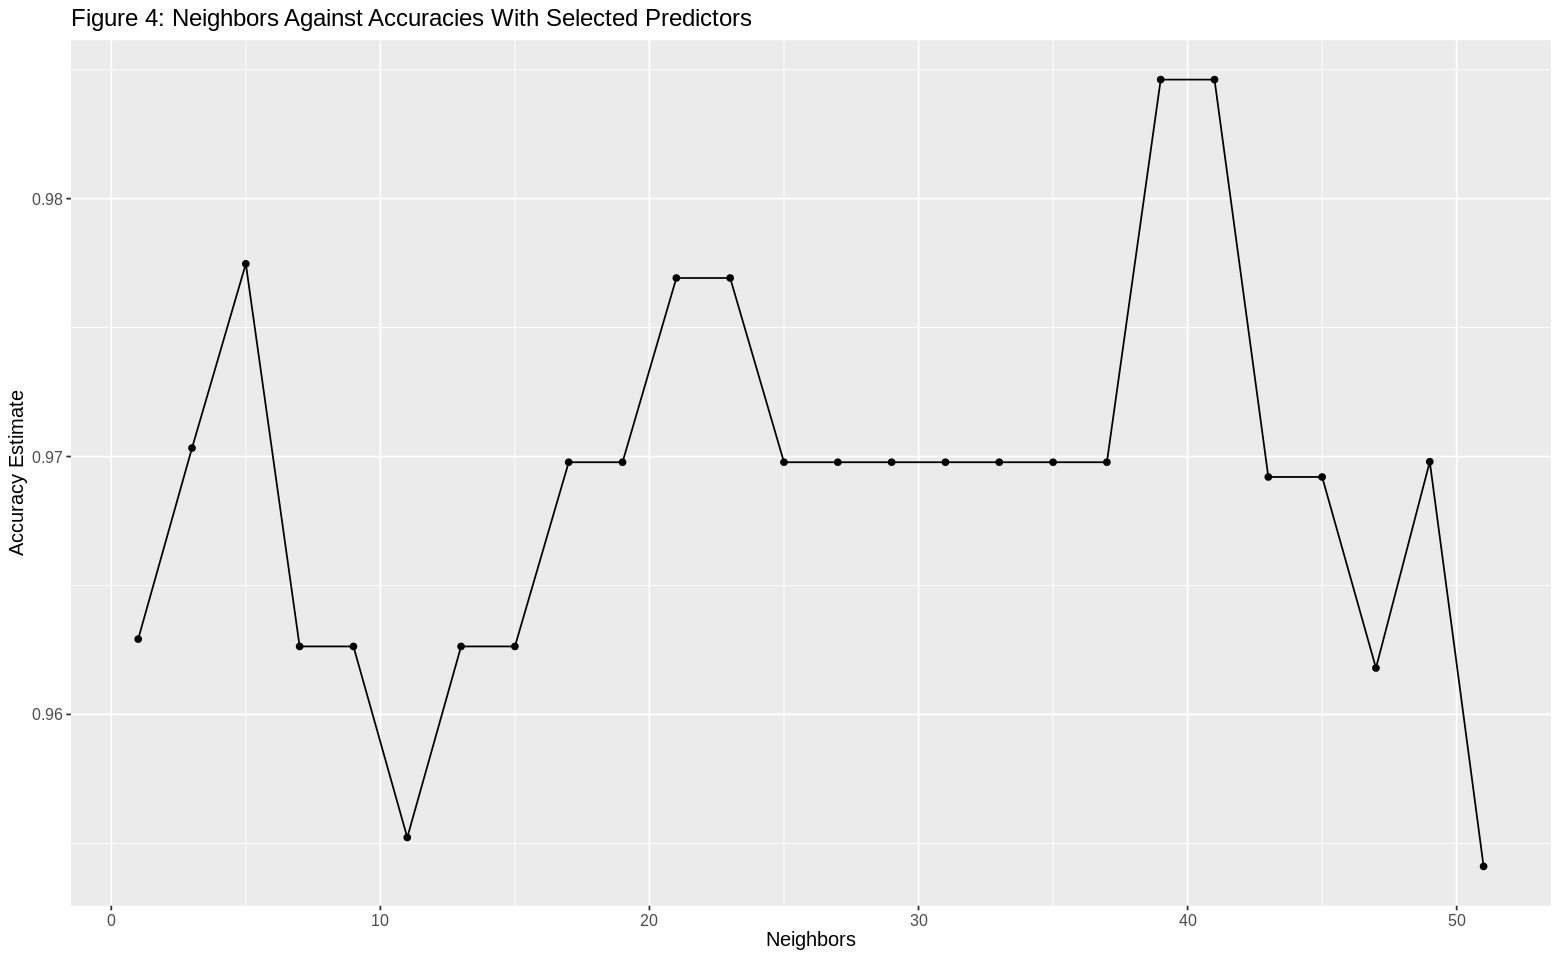

In [94]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12)) + 
  ggtitle("Figure 4: Neighbors Against Accuracies With Selected Predictors")

accuracy_vs_k

<span style="color: blue;"> 
To assist in choosing the right K for the model, the highest accuracies and their corresponding K were taken from the original data set on accuracies. This was consistent with the plot as K = 39 and K = 41 were in the first and second spots respectively. However, to take into account efficiency and the size of the data set (which is only 178 observations overall), the third most accurate K was chosen. K = 5 still provided a high accuracy of 97.7% and was a lower and more reasonable number to work with for the model.
</span>

In [95]:
highest_accuracy <- accuracies|>
        arrange(-mean)|>
        slice(1:5)|>
        select(mean,neighbors)

# Table 5: Highest accuracies and their corresponding K (with selected predictors)

In [96]:
highest_accuracy

mean      neighbors
1 0.9846154 39       
2 0.9846154 41       
3 0.9774725  5       
4 0.9769231 21       
5 0.9769231 23

<span style="color: blue;"> 
With the chosen predictors and K, the model was now built. This included standardizing the variables and creating a workflow that was then fit to the training data. Predictions for the test data set were then generated using the model (Table 6). The accuracy of the model was calculated to be around 95.6%.
</span>

In [97]:
set.seed(333)

## KNN algorithm specification 
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
       set_engine("kknn") |>
       set_mode("classification")
## KNN recipe for standardising all the variables 
wine_selected_recipe <- recipe(class ~., data = wine_training_select) |>
                        step_scale(all_predictors()) |>
                        step_center(all_predictors())
## creating a workflow to fit the recipe and the knn engine to the training data 
wine_fit <- workflow() |>
          add_recipe(wine_selected_recipe) |>
          add_model(knn_spec) |>
          fit(data = wine_training_select)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03007519
Best kernel: rectangular
Best k: 5

In [98]:
# making predictions using the trained model 
wine_test_predictions <- predict(wine_fit , wine_testing) |>
      bind_cols(wine_testing) |>
    select(.pred_class:class)

# Table 6: Results of using the model to predict classes of the test data set

In [99]:
wine_test_predictions

.pred_class class 
1  class1      class1
2  class1      class1
3  class1      class1
⋮  ⋮           ⋮     
43 class3      class3
44 class3      class3
45 class3      class3

In [100]:
# Calculating accuracy of the model 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = class, estimate = .pred_class)|>
         filter(.metric == 'accuracy')|>
         pull(.estimate)
 
wine_prediction_accuracy

[1] 0.9555556

<span style="color: blue;"> 
Although the model has produced quite a high accuracy, it is still important to validate the decisions made in building the model. To do this, a model was built using all the variables as predictors. K was chosen using cross validation (Figure 5 & Table 7). K = 5 was used because it was in the top 10 most accurate Ks but also was a reasonable size when taking efficiency and the size of the actual data set into account.
</span>

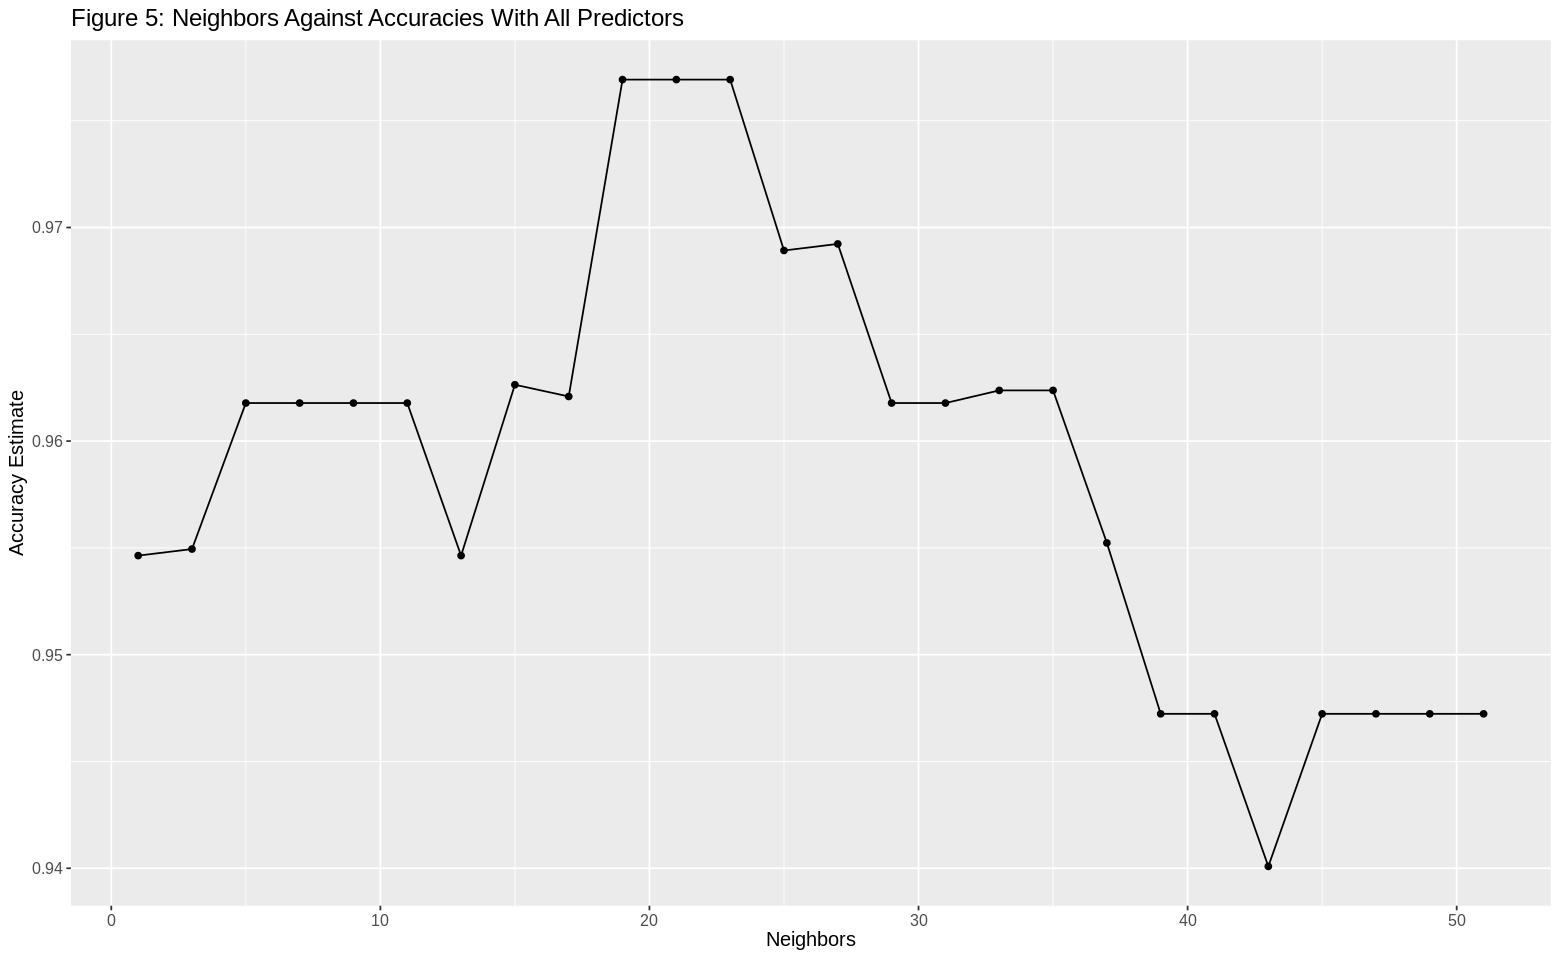

In [101]:
# Calculating accuracy using all variables as predictors, first doing cross-validation to see which K to use

# We set the seed to make sure our conclusion to be repeatable
set.seed(333)

wine_all_vfold <- vfold_cv(wine_training, v = 5,strata = class)

wine_all_recipe <- recipe(class~.,
                     data = wine_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

knn_all_tune <- nearest_neighbor(weight_func = "rectangular",
                             neighbors = tune()) |>
                  set_engine("kknn") |>
                  set_mode("classification")


knn_results <- workflow() |>
      add_recipe(wine_all_recipe) |>
      add_model(knn_all_tune) |>
      tune_grid(resamples = wine_all_vfold, grid = k_vals) |>
      collect_metrics()

all_accuracies <- knn_results |>
      filter(.metric == "accuracy")

all_accuracy_vs_k <- ggplot(all_accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12)) + 
  ggtitle("Figure 5: Neighbors Against Accuracies With All Predictors")

all_accuracy_vs_k

In [102]:
best_k_all <- all_accuracies|>
        arrange(-mean)|>
        slice(1:10)|>
        select(mean,neighbors)

# Table 7: Highest accuracies and their corresponding K (with all predictors)

In [103]:
best_k_all

mean      neighbors
1  0.9769231 19       
2  0.9769231 21       
3  0.9769231 23       
⋮  ⋮         ⋮        
8  0.9623728 35       
9  0.9620879 17       
10 0.9617802  5

<span style="color: blue;"> 
Using this new model (K = 5, all variables as predictors), it was seen that accuracy was 93.3%. The K-nn classification using K = 5 and 5 selected variables yielded an accuracy of 95.56 percent, which is very precise and indicates a high level of relationship with the predictors and the class, and was also about 2.2 percent higher than that of using all variables as predictors. This validated the decision to reduce the number of predictor variables in the model.
</span>

In [104]:
# Since the K neighbors are the same, we can just use the same model
wine_all_fit <- workflow() |>
          add_recipe(wine_all_recipe) |>
          add_model(knn_spec) |>
          fit(data = wine_training)

# show the accuracy using all variables as predictors
wine_all_accuracy <- predict(wine_all_fit, wine_testing) |>
        bind_cols(wine_testing)|>
        metrics(truth = class, estimate = .pred_class)|>
        filter(.metric == 'accuracy')|>
        pull(.estimate)

wine_all_accuracy

[1] 0.9333333

<span style="color: blue;"> 
To visualize the final results of the analysis, a confusion matrix heatmap was produced for the prediction results (Figure 6). This showed that the predictions for class 1 and 3 were highly accurate given that they were all correctly predicted. However, 2 data points of class 2 were predicted in class 1, which resulted in the decrease of overall accuracy. 
</span>

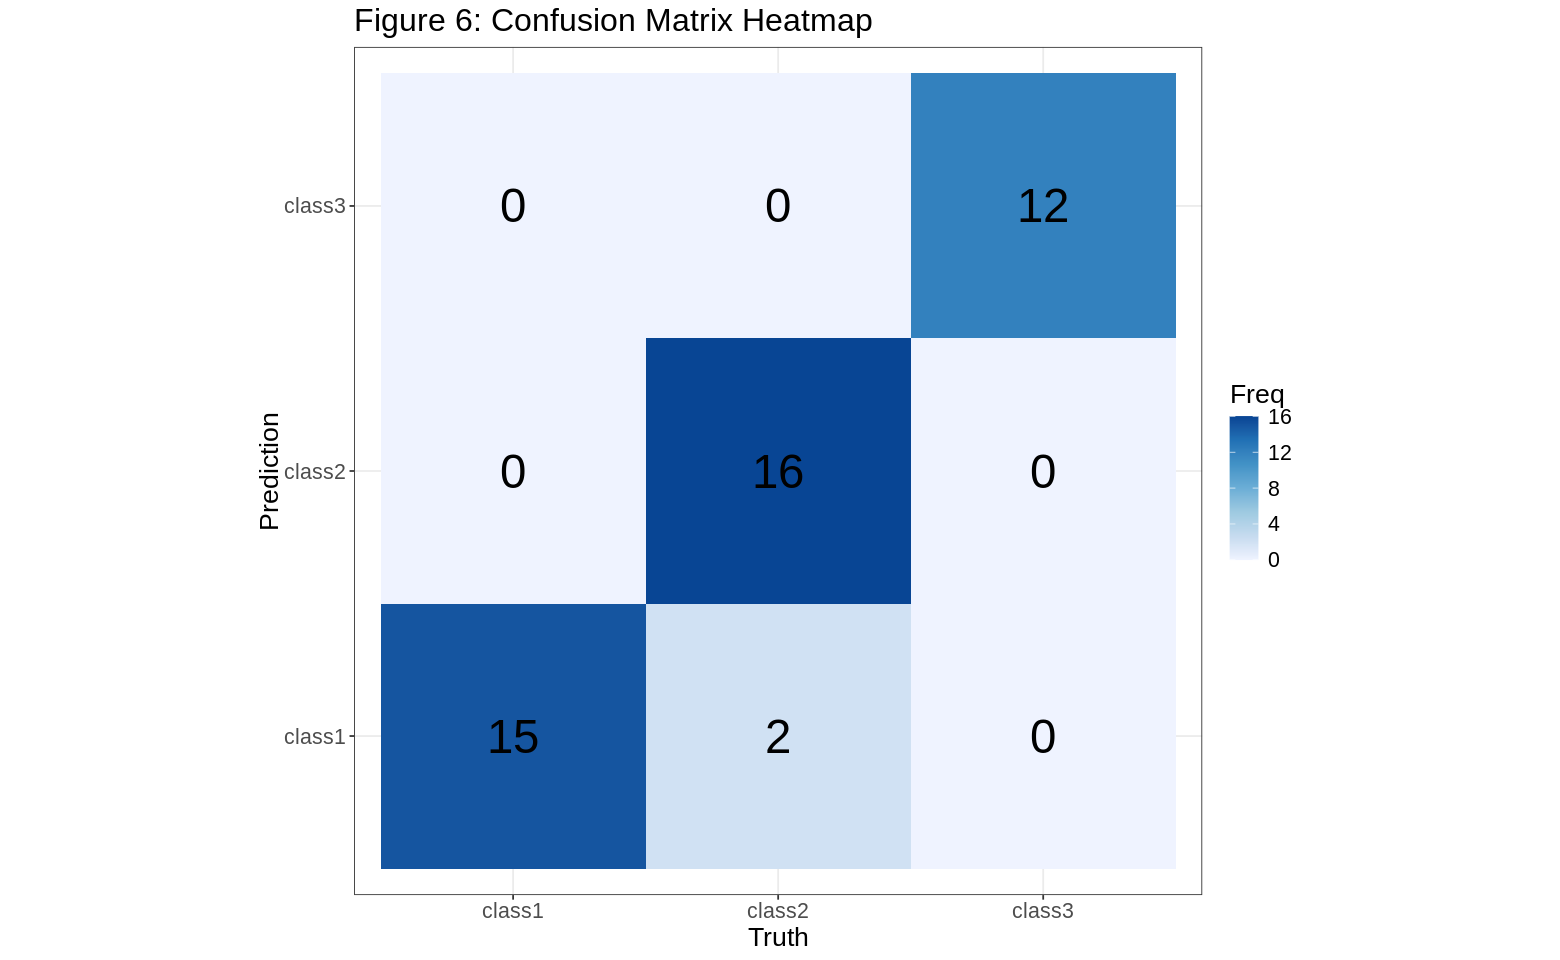

In [105]:
# drawing the confusion matrix heatmap for the prediction results

# Creating vectors for truth and prediction
Truth <- wine_test_predictions |>
             pull(class)

Prediction <- wine_test_predictions |>
             pull(.pred_class)

# Create the data frame confusion matrix
conf_mat <- as.data.frame(table(Truth, Prediction))

# Create the heatmap
heatmap <- ggplot(conf_mat, aes(x = Truth, y = Prediction, fill = Freq)) +
        geom_tile() + theme_bw() + coord_equal() +
        scale_fill_distiller(palette = "Blues", direction = 1) +
        ggtitle("Figure 6: Confusion Matrix Heatmap") +
        geom_text(aes(label = Freq), color = "black", size = 10) +
        theme(text = element_text(size = 16))
heatmap

<span style="color: blue;"> 
As the final part of the analysis, the group aimed to visualize the reason behind the wrong predictions by producing a scatter matrix of the classes and the selected variables for the test data set (Figure 7). There is quite some overlap observed between class 1 and class 2 for the proline variable, which may have contributed to the inaccurate predictions.
</span>

In [106]:
# The scatter matrix aims to show outliers are the reasons behind the two wrong prediction
options(repr.plot.width =13 , repr.plot.height = 8) 

# we only consider the selected variables
wine_testing_select <- wine_testing|>
        select(class, all_of(important_variables))

# Figure 7: Distribution of classes and correlation among selected variables

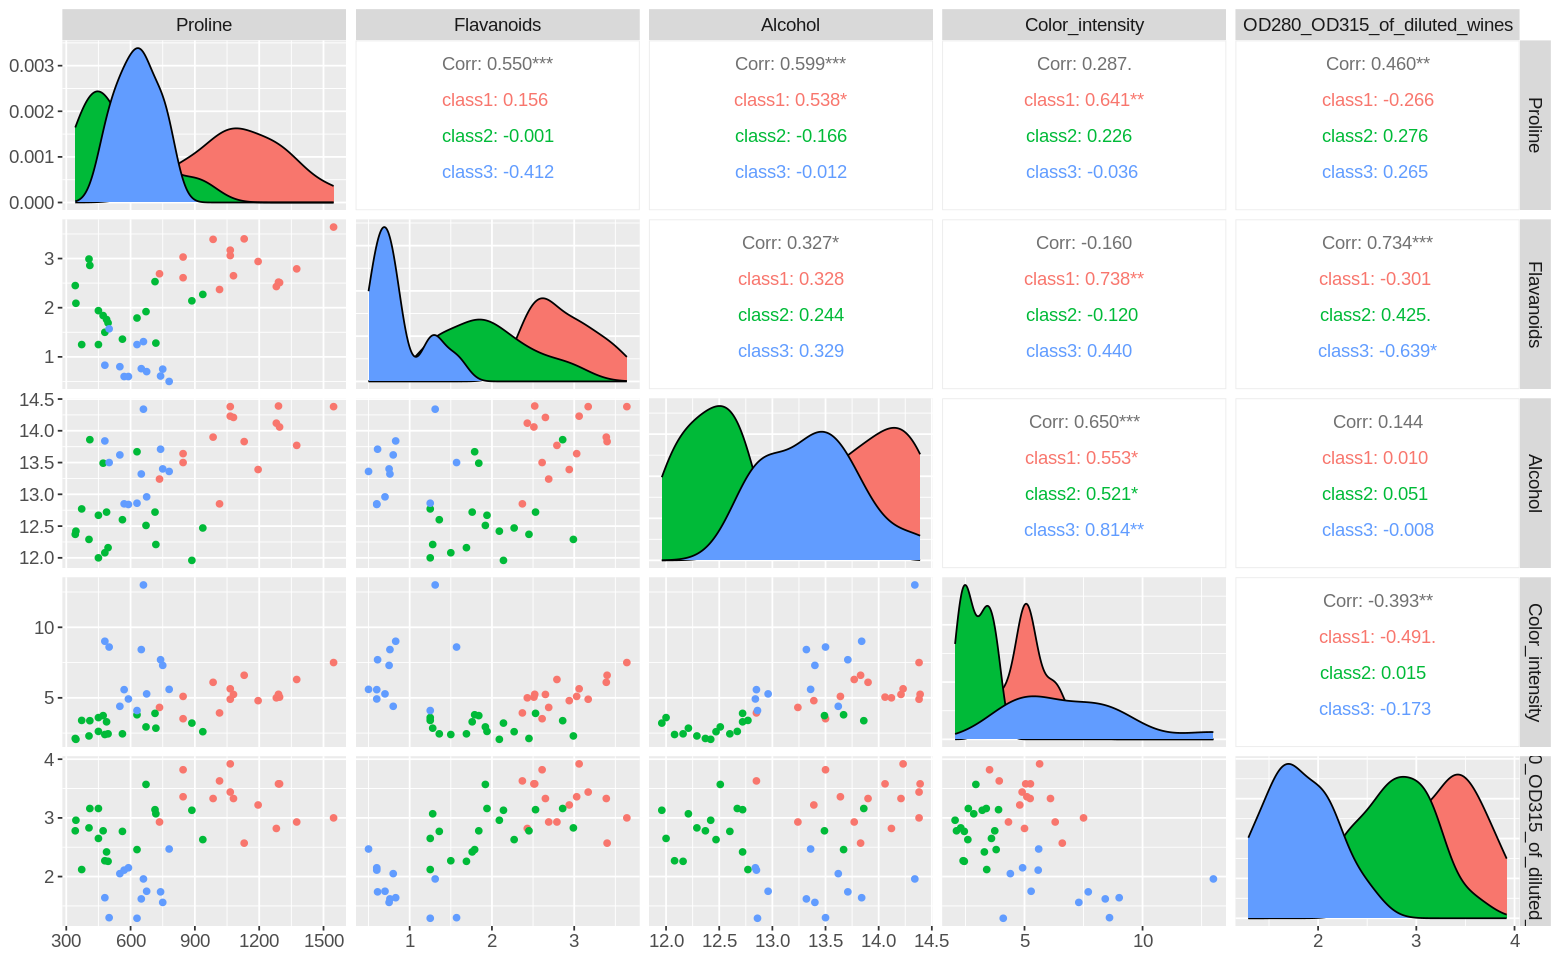

In [107]:
ggpairs(wine_testing_select, columns = important_variables, ggplot2::aes(colour=class)) + theme(text = element_text(size = 14))

## **IV. Discussion**

In summary, basic exploratory analysis of the UCI Wine dataset showed a relatively balanced distribution of the three wine cultivars. Visualization of color intensity and alcohol content by class provided insights into the dataset's structure. In identifying the five most important variables correlated to a wine's cultivar, a random forest model and a scatter matrix was utilized. This resulted in choosing Proline, Flavanoids, Alcohol, Color intensity, and OD280/OD315 of diluted wines (an indicator of protein content) as predictors. The K-nearest neighbors (KNN) algorithm was then tuned to select the optimal number of neighbors, with K = 5 chosen based on balancing between model complexity and accuracy. Cross-validation was used throughout the analysis to ensure model robustness. Accuracy from predicting the test data set was calculated to be 95.6%. The model was validated by determining the accuracy of another model using the same K but all variables as predictors, which actually resulted in lower accuracy. Finally, a confusion matrix heatmap visualized the prediction outcomes from the test data set alongside a scatter matrix of the test data to display possible reasons driving the 2 wrong predictions.

In this project, our group expected to be able to predict the grape cultivar of a wine based on its chemical composition with high accuracy. The final model achieved high accuracy, indicating that the chemical composition can effectively predict wine class. However, it was unexpected that the final accuracy was 95.6% when the initial predicted accuracy was 97.7% based on the neighbors vs. accuracy plot. Given that the scatter matrix of the test data showed some overlap in the distribution of classes over the predictors, perhaps the discrepancy in accuracy could be resolved by using a larger data set that would produce clearer boundaries in the distributions. This would result in more accurate predictions. Overall, the analysis successfully predicted wine class based on its chemical attributes with high accuracy, confirming the initial hypothesis that levels of chemical compounds can rigorously determine grape cultivars.

The findings of this project could be impactful for winemakers and wine connoisseurs because being able to accurately predict the origin of the grapes from a wine can provide valuable information on the distinct characteristics of cultivars. This can be a tool in wine quality assurance and authentication. Additionally, it can facilitate research into the relationships between grape cultivars and the sensory attributes of wine.

Additionally, this exploration could spark projects investigating how accurately vineyards or individual winemakers can be predicted based solely on a wine's chemical composition. More analysis can be done to further refine accuracy. One idea would be employing datasets with a larger pool of observations. Another would be exploring the inclusion of additional chemical attributes not currently in the dataset as predictive variables, particularly if they demonstrate less overlapping distributions within the three defined classes. Furthermore, investigating observations from grape varieties cultivated in various regions across Italy or other countries could yield intriguing insights.

## **IV. References**

1. Aeberhard, S. & Forina ,M. (1991). Wine. UCI Machine Learning Repository. https://doi.org/10.24432/C5PC7J.
2. Breiman, L., Cutler, D. R., Liaw, A., & Wiener, M. (2022). randomForest: Breiman and Cutler's Random Forests for Classification and Regression. Retrieved from https://cran.r-project.org/web/packages/randomForest/randomForest.pdf
3. Jana, D. K., Bhunia, P., Adhikary, S. D., & Mishra, A. (2023). Analyzing of salient features and classification of wine type based on quality through various neural network and support vector machine classifiers. Results in Control and Optimization, 11, 100219. https://doi.org/10.1016/j.rico.2023.100219.
4. Marzano, M., Fosso, B., Manzari, C., Grieco, F., Intranuovo, M., Cozzi, G., Mulè, G., Scioscia, G., Valiente, G., Tullo, A., Sbisà, E., Pesole, G., & Santamaria, M. (2016). Complexity and Dynamics of the Winemaking Bacterial Communities in Berries, Musts, and Wines from Apulian Grape Cultivars through Time and Space. PLOS ONE, 11(6), e0157383. https://doi.org/10.1371/journal.pone.0157383.
5. R-Bloggers. (2021, April 13). Random Forest in R. Retrieved from https://www.r-bloggers.com/2021/04/random-forest-in-r/
6. Restuccia, D., Sicari, V., Pellicanò, T. M., Spizzirri, U. G., & Loizzo, M. R. (2017). The impact of cultivar on polyphenol and biogenic amine profiles in Calabrian red grapes during winemaking. Food Research International, 102, 303-312. https://doi.org/10.1016/j.foodres.2017.10.012.
